In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
### Loading Exposure data ####
data_exp = pd.read_json('Integrated_exposure_Cat2_final.json')
data_exp = data_exp.T

e_exp = data_exp.index.to_numpy()

print(len(e_exp))

exp_upper = data_exp['Exposure Upper'].to_numpy()
exp_lower = data_exp['Exposure Lower'].to_numpy()
exp_upper_err = data_exp['Exposure Upper error'].to_numpy()
exp_lower_err = data_exp['Exposure Lower error'].to_numpy()


### Loading localization data ####

event, RA, RA_err, DEC, DEC_err = np.loadtxt('cat2_localization.txt', unpack=True )

event_idx = np.argsort(event)

event = event[event_idx].astype(int)
RA = RA[event_idx]
DEC = DEC[event_idx]
RA_err = RA_err[event_idx]
DEC_err = DEC_err[event_idx]


idx_e = np.where(np.isin(e_exp, event, invert=True))[0]

print(len(idx_e))

e_exp = np.delete(e_exp, idx_e)
exp_upper = np.delete(exp_upper, idx_e)
exp_upper_err = np.delete(exp_upper_err, idx_e)
exp_lower = np.delete(exp_lower, idx_e)
exp_lower_err = np.delete(exp_lower_err, idx_e)

print(len(exp_upper))


#### Removing one failed exposure event. This can change once I have full the dataset ####

id_fail = np.where(event == 16704296)[0][0]
print(id_fail)
DEC = np.delete(DEC, id_fail)

4946
88
4858
35


In [80]:
data = pd.DataFrame()

data['Event'] = e_exp.tolist()
data['Exp_upper'] = exp_upper.tolist()
data['Exp_upper_err'] = exp_upper_err.tolist()
data['Exp_lower'] = exp_lower.tolist()
data['Exp_lower_err'] = exp_lower_err.tolist()

data['DEC'] = DEC.tolist()

data['Zenith'] = (DEC - 49.19).tolist()

zen = DEC - 49.19 ### Roughly CHIME's latitude


zen_lower = np.zeros(len(e_exp))
dec_lower = np.zeros(len(e_exp))

for i in range(len(e_exp)):
    if exp_lower[i] > 0:
        zen_lower[i] = 180 - 49.19 - DEC[i] 
        dec_lower[i] = DEC[i]

data['Zen_lower'] = zen_lower.tolist()
data['DEC_lower'] = dec_lower.tolist()

In [81]:
data.to_csv('Exposure_and_DEC.csv')

In [82]:
display(data)

,Event,Exp_upper,Exp_upper_err,Exp_lower,Exp_lower_err,DEC,Zenith,Zen_lower,DEC_lower
0,9386707,204.036211,92.272283,0.000000,0.000000,64.758182,15.568182,0.000000,0.000000
1,9476952,1551.668473,640.014263,1426.240638,634.362814,87.370413,38.180413,43.439587,87.370413
2,9574801,1253.753714,64.424120,1474.008437,31.419292,85.426980,36.236980,45.383020,85.426980
3,9641579,255.816770,111.407742,0.000000,0.000000,69.300325,20.110325,0.000000,0.000000
4,10366092,315.401666,188.634711,286.140296,194.118101,77.979466,28.789466,52.830534,77.979466
...,...,...,...,...,...,...,...,...,...
4853,318900480,189.979138,109.187625,0.000000,0.000000,65.764210,16.574210,0.000000,0.000000
4854,318902097,84.760939,50.553120,0.000000,0.000000,26.989215,-22.200785,0.000000,0.000000
4855,318959682,177.095049,100.112257,0.000000,0.000000,65.108843,15.918843,0.000000,0.000000
4856,318984779,205.576894,114.351584,0.000000,0.000000,68.357266,19.167266,0.000000,0.000000


<ipython-input-87-d5c30e08d709>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


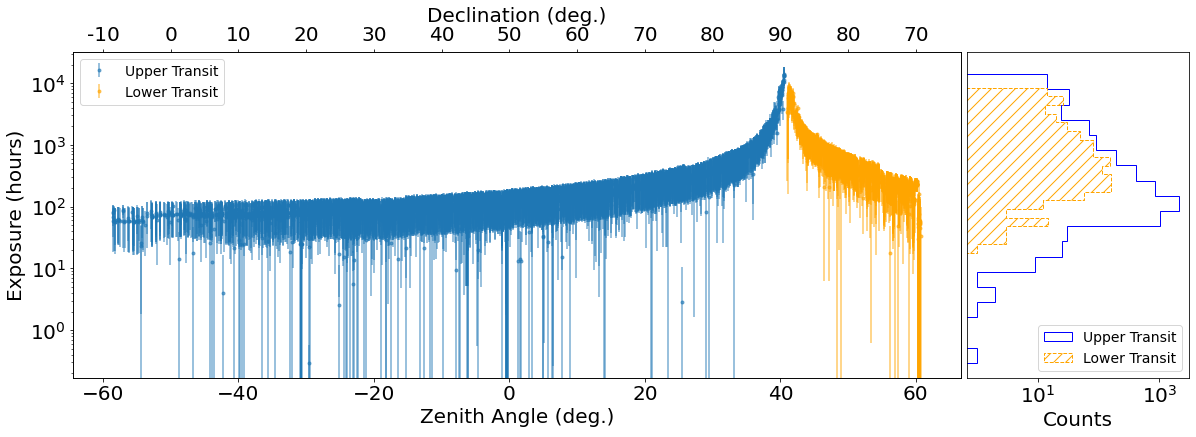

In [87]:
#### plotting ####


fig =  plt.figure(figsize=(20,6))

gs = fig.add_gridspec(1, 2, width_ratios=[4,1], wspace=0.01)

ax1 = fig.add_subplot(gs[0,0])


# Plotting the Upper Transit data
ax1.errorbar(zen, exp_upper, yerr=exp_upper_err, fmt='.', alpha=0.6, label = 'Upper Transit')

# Plotting the lower transit data 

exp_lower_sc = exp_lower[exp_lower > 0]
zen_lower_sc = zen_lower[zen_lower > 40.81]
exp_lower_err_sc = exp_lower_err[exp_lower_err > 0]

ax1.errorbar(zen_lower_sc, exp_lower_sc, yerr=exp_lower_err_sc, fmt='.', alpha=0.6, color='orange', label='Lower Transit')

ax1.set_yscale('log')

ax1.set_xlabel('Zenith Angle (deg.)', fontsize=20)
ax1.set_ylabel('Exposure (hours)', fontsize=20)

ax1.tick_params(axis='both', labelsize=20)

# Create a secondary axis for Declination on the top
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  
ax2.set_xticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])
ax2.set_xticklabels([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 80, 70])
ax2.set_xlabel('Declination (deg.)', fontsize=20)
ax2.tick_params(axis='x', labelsize=20)

#### Plot the historgram ####
ax_hist = fig.add_subplot(gs[0,1], sharey=ax1)

bins=20
hist, bins_w = np.histogram(exp_upper, bins=bins)
logbins = np.logspace(np.log10(bins_w[0]), np.log10(bins_w[-1]), bins)

ax_hist.hist(exp_upper, bins=logbins, orientation='horizontal', histtype='step', color='blue', label='Upper Transit')

exp_lower_hist = exp_lower[exp_lower > 0]

hist, bins_w = np.histogram(exp_lower_hist, bins=bins)
logbins = np.logspace(np.log10(bins_w[0]), np.log10(bins_w[-1]), bins)

ax_hist.hist(exp_lower_hist, bins=logbins, orientation='horizontal', histtype='step', color='orange', linestyle='--', hatch='//', label='Lower Transit')

ax_hist.set_xscale('log')

ax_hist.yaxis.set_visible(False)

ax_hist.set_xlabel('Counts', fontsize=20)
ax_hist.tick_params(axis='x', labelsize=20)

ax1.legend(loc='upper left', fontsize=14)
ax_hist.legend(loc='lower right', fontsize=14)


plt.tight_layout()
plt.savefig('DEC_vs_exp.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [88]:
print(np.max(exp_upper))
print(np.max(exp_lower))

13935.584452482655
8498.686905431052
